<a href="https://colab.research.google.com/github/nstagnaro/mat281-repository/blob/main/PUB_INF_398_Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Introducción al Aprendizaje Automático: Taller 1

El objetivo de este taller consiste en familiarizarse con conceptos básicos del aprendizaje automático y con herramientas que le permitan implementar modelos competitivos correctamente.


<table align='left'>
<tr>
<td><img src='https://upload.wikimedia.org/wikipedia/commons/f/f6/Balen_Minerva_among_the_Muses_%28detail%29.jpg' width='800'/> </td>
</tr>
</table>



# Problema

La música (del griego: mousikē téchnē, "el arte de las musas") es una de las tradiciones más antiguas y universales de la cultura humana. Desde los orígenes de la especie hasta nuestros días, la música se ha desarrollado en un sin número de géneros y estilos que, gracias la tecnología, están a sólo un click de distancia.

En este notebook construiremos clasificadores para predecir el *género* de una canción usando datos obtenidos desde la conocida aplicación *Spotify*.


# Datos

Utilizaremos un dataset denominado *Spotify Tracks DB*
proveniente [*kaggle.com*](https://www.kaggle.com/), plataforma en línea para competencias de ciencia de datos y aprendizaje automático con un gran número desafíos interesantes.


In [92]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS' -O T1ML_SpotifyTracksDB.csv

--2023-08-19 02:08:55--  https://docs.google.com/uc?export=download&id=17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS
Resolving docs.google.com (docs.google.com)... 64.233.187.102, 64.233.187.139, 64.233.187.138, ...
Connecting to docs.google.com (docs.google.com)|64.233.187.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s377l14ti5u3loeckd72krgi0atf4hv3/1692410925000/12461978637957472934/*/17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS?e=download&uuid=33470a39-403b-4bf5-b9eb-7e79ee50ff32 [following]
--2023-08-19 02:08:58--  https://doc-00-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s377l14ti5u3loeckd72krgi0atf4hv3/1692410925000/12461978637957472934/*/17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS?e=download&uuid=33470a39-403b-4bf5-b9eb-7e79ee50ff32
Resolving doc-00-b8-docs.googleusercontent.com (doc-00-b8-docs.googleusercontent.com)... 64.233.187.132, 2404:6800:

El dataset describe las características de 232.000 canciones y sus correspondientes géneros. Las características incluyen:


*   Bailabilidad: Medida de qué tan adecuada es una canción para bailar, según factores como la estabilidad y la fuerza del ritmo.

*   Energía: Representa la intensidad y el nivel de actividad de una canción.

*   Valencia: También conocido como "positividad", este atributo indica el estado de ánimo o la emoción de una canción, que va desde triste hasta alegre.

*   Acústica: Mide la presencia de sonidos acústicos en una pista (es decir, sonidos sin procesamiento o intervención electrónica).

*   Instrumentalidad: Determina el grado de voces en una canción.

*   Vivacidad: Indica la presencia de una audiencia en vivo en la grabación.

*   Habla: Refleja la cantidad de palabras habladas o contenido vocal en una pista.

*   Tempo: El "tempo" se refiere a la velocidad o ritmo al que se interpreta o se escucha una pieza de música. En vez de recurrir a clasificaciones tradicionales como "adagio", "andante", "allegretto grazioso", Spotify Tracks DB mide el "tempo" en pulsos por minuto (BPM).

*   Compás: Representa la estructura rítmica de la canción. Está compuesta por dos números apilados verticalmente, que generalmente aparecen al principio de una partitura. El número superior representa la cantidad de tiempos por compás. El número inferior indica el tipo de nota que representa un tiempo. Por ejemplo, la canción "Ya no te espero" de Silvio Rodriguez está compuesta en 4/4.

*   Modo: Especifica si una pista está en una tonalidad mayor (feliz) o menor (triste).

# Instrucciones

Cada una de las siguientes secciones contiene preguntas que usted deberá abordar en el video explicativo a enviar. Se evaluarán sus respuestas a cada sección (P1, P2, etc) y su nota se calculará como el promedio de todas las secciones.

Para evaluar cada parte se considerará:

*   Completitud: Se respondió o se hizo lo pedido?
*   Correctitud: Se abordó lo pedido de modo técnica o metodológicamente correcto?
*   Profundidad: Se demostró interés, espíritu crítico, espíritu de investigación, y estudio de las materias?
*   Claridad: Se explicó de modo claro y sintético lo realizado, destacando lo relevante sin caer en detalles superfluos?

Fuera de eso:

*   Originalidad: Se incluyen observaciones agudas e interesantes, o se hacen experimentos novedosos más allá de lo solicitado. Estos elementos sumarán puntos.

# Librerías

Como ya es usual utilizaremos Python y su ecosistema básico para ciencia de datos y machine learning. En particular emplearemos Scikit-learn (sklearn), una librería de alto nivel que proporciona varias herramientas para minería de datos y aprendizaje automático. Su facilidad de uso y eficiencia la convierte en una herramienta valiosa tanto por principiantes como por profesionales experimentados en el campo.
Puede modificar esto a su conveniencia.

In [1]:
# Plotting libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
# Scikit learn
import sklearn.preprocessing as skp
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
# Scikit Metrics
from sklearn.metrics import log_loss, classification_report, accuracy_score, f1_score,roc_auc_score
# Data manipulation libraries
import pandas as pd
import numpy as np
# General use
from joblib import dump, load
import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(8,4)})
plt.rcParams.update({'font.size': 8})
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend',fontsize=10)

## P1. Cargado de datos y Exploratorio

Como punto de partida conviene siempre explorar los datos disponibles, determinando con cuántos cuenta, de qué tipos de datos se trata, cuántas clases existen, etc.

In [21]:
data_path = ''
file_name = 'T1ML_SpotifyTracksDB.csv'

En la siguiente celda se carga el dataset como un dataframe de la librería *pandas*, que provee muchas funcionalidades para trabajar con datos tabulares.  

In [22]:
data_df = pd.read_csv(data_path + file_name)
display(data_df.head(5))

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.0,0.611,0.389,99373.0,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1.0,0.246,0.590,137373.0,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3.0,0.952,0.663,170267.0,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.0,0.703,0.240,152427.0,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4.0,0.950,0.331,82625.0,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Es fácil ver que existen varios datos faltantes, situación común en la práctica.

In [23]:
nan_df = data_df[data_df.isna().any(axis=1)]
display(nan_df.head(5))

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
23,Movie,Jean Claude Corbel,Pourquoi aller plus loin ?,15CpJP0LXchBUjpB8RKh8m,0.0,0.669,0.707,71299.0,0.6960,0.000,C,0.197,-10.472,Major,0.0280,114.752,NaN,0.833
98,NaN,Richard M. Sherman,Forgotten Dreams,3PyfS1XmjHk1JZ004a2bFZ,0.0,NaN,0.429,89947.0,0.0478,0.959,E,0.102,-14.170,Minor,0.0468,82.388,4/4,0.111
116,Movie,Chorus,Swami Samartha Majhe Aai,3nGNIiz4PTsZ7cRhNNuSd2,0.0,0.228,0.684,203492.0,0.7460,0.000,G#,0.196,-5.847,Major,NaN,107.854,4/4,0.745
141,R&B,Nao,Make It Out Alive (feat. SiR),21Ft8ME799DMZjxNwmui6Z,64.0,0.667,0.670,239147.0,0.6490,NaN,C,0.109,-7.426,Minor,0.0875,147.935,4/4,0.618
166,R&B,Nick Jonas,"Introducing Me - From ""Camp Rock 2: The Final ...",74tQaH4CxM5Rs9BzerEbHr,68.0,0.460,NaN,186893.0,0.4960,0.000,B,0.106,-6.049,Major,0.0511,113.072,4/4,0.676


In [24]:
print(len(nan_df)/len(data_df))
#print(data_df)

0.017845096143517026
        genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie         Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  popularity  acousticne

*  Por simplicidad se eliminanemos todas las filas (registros) con datos faltantes. ¿Es esto una buena práctica? Comente.

In [26]:
data_df = data_df.dropna()

#Creemos que es una buena practica eliminar los nan, puesto que estos pueden ser perjudiciales a la hora de querer trabajar con
#los datos, al generarse errores en la ejecucion de codigo, por ejemplo al calcular ciertos estadisticos
#(poner algo mas si se nos ocurre)

In [27]:
print(f'Datos presentes: {len(data_df)}')
print(data_df)
print("Columnas del dataset:\n", data_df.columns.values)

Datos presentes: 228572
        genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie         Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  popularity  acousti

* Determine los distintos géneros presentes en el dataset y comente. ¿Detecta alguna irregularidad en los datos? Si es así, proponga una solución.


In [19]:
genres = data_df['genre'].unique()
print("\nGéneros:\n", genres)


Géneros:
 ['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']


* Gráfique la cantidad de canciones por género y comente, ¿Qué ocurrirá si creamos un modelo de clasificación en torno a esta columna?. ¿Nota alguna anomalía que pueda afectar el entrenamiento? Si es así, proponga una solución.

*Hint: Use the all powerful seaborn library for plotting*

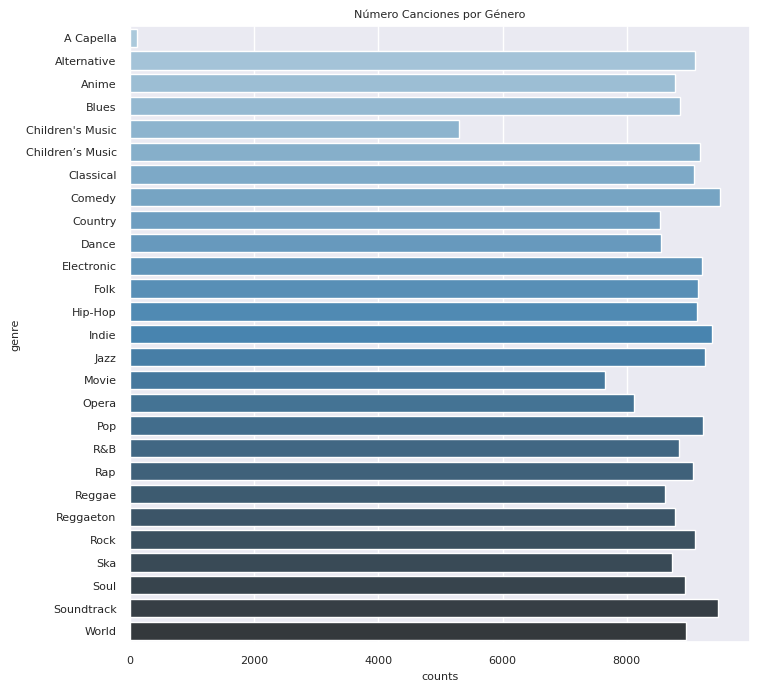

In [77]:
gr = data_df.groupby(['genre']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,8),nrows=1)
sns.barplot(data=gr, y='genre', x='counts', palette="Blues_d", ax=ax)
ax.set_title('Número Canciones por Género',size=8)
plt.show()

* Note que hay una clase con errores de escritura. Repárela.

In [20]:
data_df.loc[data_df['genre']=="Children’s Music", 'genre'] = "Children's Music"

* Gráfique los 30 artistas más populares y comente sobre la distibución de estos.

*Hint: Use the all powerful seaborn library for plotting*

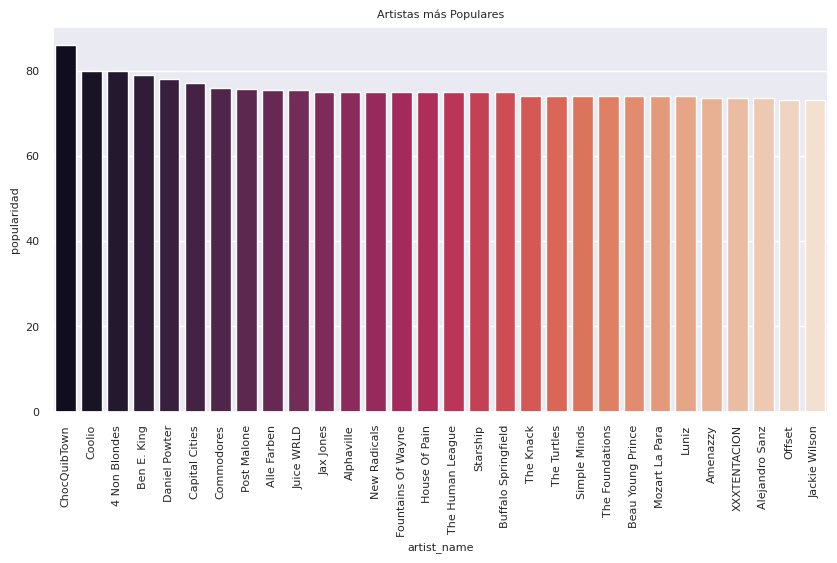

In [114]:
gr = data_df.groupby(['artist_name'])['popularity'].mean().sort_values(ascending=False)
gr = gr.reset_index(name='popularidad').head(30)
fig, ax = plt.subplots(figsize=(10,5),nrows=1)
p = sns.barplot(data=gr, x='artist_name', y='popularidad', palette="rocket",ax=ax)
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Artistas más Populares',size=8)
plt.show()

## P2. Pre-procesamiento e Ingeniería de Atributos

El objetivo de esta sección es que aprenda a preparar los datos correctamente antes de aplicar un método de aprendizaje clásico y que eventualmente modifique/seleccione el conjunto de atributos que sobre los que entrenará el modelo. Por el lado más práctico, podrá familiarizarse con diferentes funcionalidades de la librería sklearn.



* Elija los 5 géneros más releventes para usted y filtre el dataset para obtener solo datos pertenecientes a los géneros de interés. Re-examine la distribución de ejemplos por clase. Repita la gráfica de 1.2 y comente *Hint: You might find Pandas "isin" method useful.*

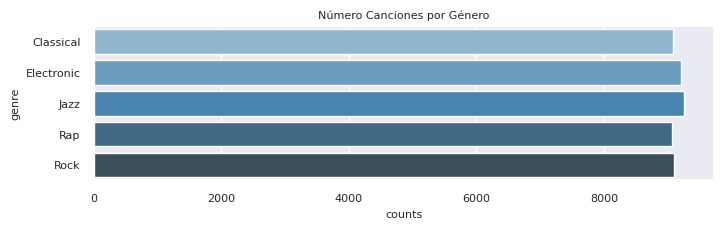

In [117]:
genres = ['Classical','Electronic','Jazz','Rock','Rap']#cambiar como desee
data_df = data_df[data_df['genre'].isin(genres)]
genre_to_number = {label: i for i, label in enumerate(set(genres), 0)}
number_to_genre = {i: label for i, label in enumerate(set(genres), 0)}

gr = data_df.groupby(['genre']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,2),nrows=1)
sns.barplot(data=gr, y='genre', x='counts', palette="Blues_d", ax=ax)
ax.set_title('Número Canciones por Género', size=8)
plt.show()

In [118]:
print(data_df['genre'].unique())

['Electronic' 'Rap' 'Classical' 'Jazz' 'Rock']


* Grafique las variables categóricas y continuas por género. Comente señalando qué variables considera que permiten diferenciar mejor los géneros y cuáles no. Reflexione sobre el impacto de mantener o quitar estos atributos del dataset. *Hint: Create one figure plot for continous variables and other for categorical.*

* Seleccionar características permite reducir la dimensionalidad y mejorar la eficiencia del modelo a entrenar. Si le obligarán a construir un modelo que use $5 \pm 2$ características, ¿Cuáles elegiría en base a la información disponible en esta etapa?

['genre' 'artist_name' 'track_name' 'track_id' 'popularity' 'acousticness'
 'danceability' 'duration_ms' 'energy' 'instrumentalness' 'key' 'liveness'
 'loudness' 'mode' 'speechiness' 'tempo' 'time_signature' 'valence']


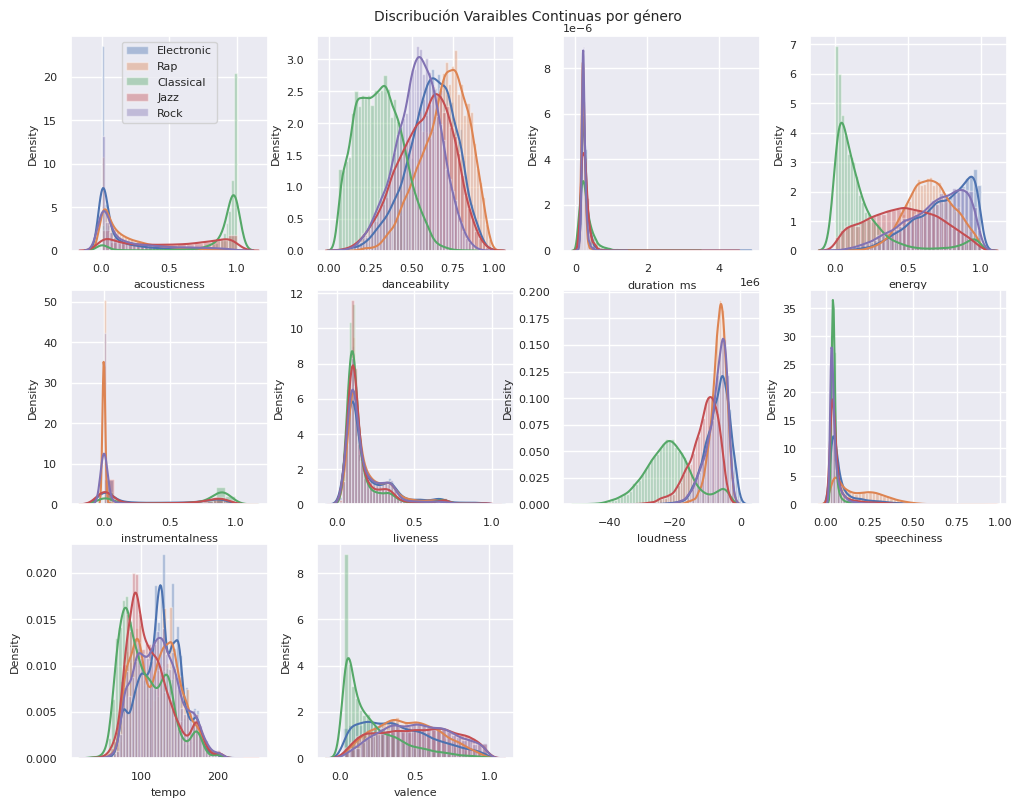

In [120]:
print(data_df.columns.values)

# Variables continuas
cont_predictors_names = ['acousticness','danceability','duration_ms','energy',
                         'instrumentalness','liveness','loudness','speechiness',
                         'tempo','valence']
# Variables categoricas
cat_predictors = ['mode','time_signature','key']
other_predictors = ['genre','artist_name','track_name','track_id']


fig, axes = plt.subplots(figsize=(10,8), nrows=3, ncols=4)
fig.suptitle('Discribución Varaibles Continuas por género', fontsize=10)
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
for i, column in enumerate(cont_predictors_names):
    #print(i//3, i%3)
    for genre in data_df['genre'].unique():
      target = data_df.loc[data_df['genre'] == genre]
      sns.distplot(target[column], hist=True, rug=False, kde=True,
                   ax=axes[i//4,i%4], label=genre)
      if i==0:
        axes[0,0].legend(prop={'size': 8})


axes[-1,-2].axis('off')
axes[-1,-1].axis('off')
plt.show()


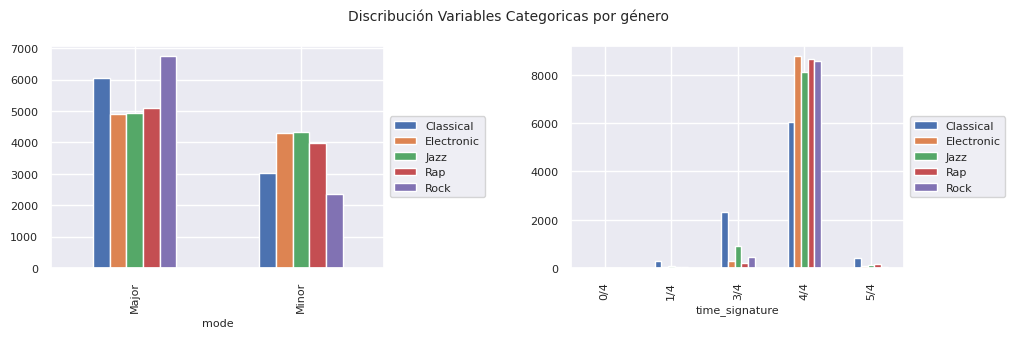

In [121]:
fig, axes = plt.subplots(figsize=(10,3), nrows=1, ncols=2)
fig.suptitle('Discribución Variables Categoricas por género', fontsize=10)
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
for i, column in enumerate(cat_predictors[:-1]):
  df_gb = data_df.groupby([column, 'genre']).size().unstack(level=1)
  df_gb.plot(kind='bar', ax=axes[i%3])
  box = axes[i%3].get_position()
  axes[i%3].set_position([box.x0, box.y0, box.width * 0.8, box.height])
  axes[i%3].legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 8})

plt.show()


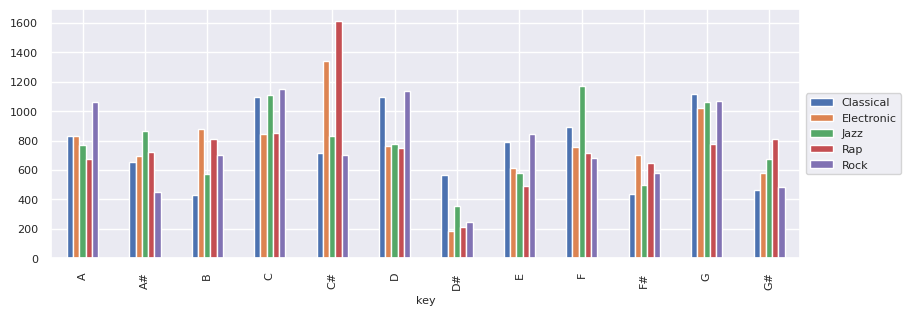

In [122]:
fig, ax = plt.subplots(figsize=(10,3), nrows=1, ncols=1)
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
df_gb = data_df.groupby(['key', 'genre']).size().unstack(level=1)
df_gb.plot(kind = 'bar',ax=ax)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 8})

plt.show()

La etapa de preprocesamiento es un paso crucial en el aprendizaje automático que implica preparar y limpiar los datos para mejorar el rendimiento de los modelos. Ya hemos "tratado" *datos faltantes* y hemos considerado la posibilidad de *seleccionar características*. También explorar la presencia de valores atípicos para garantizar la calidad de los datos.






* Determine si existen atributos continuos con valores atípicos usando alguna herramienta de visualización. *Hint: Consider the use of boxplots and exploit the all power of seaborn library for plotting.*

Otras operaciones típicas de pre-procesamiento incluyen:



1. Escalado de Características: Estandarizar o normalizar características para asegurar que estén en escalas similares, lo que ayuda a algoritmos sensibles a diferencias de magnitud.
2. Codificación de Características Categóricas: Convertir variables categóricas en representaciones numéricas para compatibilidad con modelos.

* Para los Atributos continuos, investigue sobre el módulo *preprocessing* de scikit learn, específicamente la sección: *Preprocessing and Normalization*. A partir de lo anterior determine qué normalizador es más adecuado para cada atributo, explique el porqué de las elecciones (si sus elecciones son justificadas experimentalmente, indique claramente su metodología). Si no necesita realizar normalización sobre un atributo, explique por qué. Una vez que haya elegido sus normalizadores, aplíquelos a las columnas correspondientes.

* Para los atributos categóricos, al igual que los continuos, investigue sobre el módulo preprocessing de scikit learn, específicamente la sección: Preprocessing and Normalization, sin embargo, ahora fíjese en los Encoders. Determine que encoder le conviene dependiendo de los atributos categóricos y de su variable objetivo, explique el porqué de las elecciones (si sus elecciones son justificadas experimentalmente, indique claramente su metodología). Aplique los encoders determinados sobre los atributos y la columna objetivo.


* Para los atributos categóricos, al igual que los continuos, investigue sobre el módulo preprocessing de scikit learn, específicamente la sección: Preprocessing and Normalization, sin embargo, ahora fíjese en los Encoders. Determine que encoder le conviene dependiendo de los atributos categóricos y de su variable objetivo, explique el porqué de las elecciones (si sus elecciones son justificadas experimentalmente, indique claramente su metodología). Aplique los encoders determinados sobre los atributos y la columna objetivo.

De lo visto en clases podrá recordar que la representación de los datos afecta la complejidad de resolver la tarea final. En su caso, ya se dispone de varios atributos de alto nivel para hacer la predicción, pero de todos modos es posible "crear" atributos adicionales que "expandan" el espacio de características original. La celda que sigue crea atributos polinomiales a partir de los atributos continuos.



*   Prepare estos nuevos atributos apropiadamente en un dataframe separado de modo de poder evaluar su efectividad más adelante.

In [67]:
from sklearn.preprocessing import PolynomialFeatures

cont_predictors_names = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']
cat_predictors = ['mode','time_signature','key']

cont_features = data_df[cont_predictors_names]
cat_features = data_df[cat_predictors]

poly = PolynomialFeatures(degree=3,include_bias=False)
expanded_features = poly.fit_transform(cont_features.values)
cont_predictors_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(cont_predictors_names,p) for p in poly.powers_]]
expanded_data = pd.DataFrame(expanded_features, columns = cont_predictors_names)
#puede concatenar
X = pd.concat([expanded_data.reset_index(drop=True),cat_features.reset_index(drop=True)],axis=1)
display(X.head(5))

,acousticness^1,danceability^1,duration_ms^1,energy^1,instrumentalness^1,liveness^1,loudness^1,speechiness^1,tempo^1,valence^1,...,speechiness^1xtempo^2,speechiness^1xtempo^1xvalence^1,speechiness^1xvalence^2,tempo^3,tempo^2xvalence^1,tempo^1xvalence^2,valence^3,mode,time_signature,key
0,0.153000,0.841,212500.0,0.798,0.000003,0.0618,-4.206,0.2290,95.948,0.591,...,2108.178283,12.985506,0.079985,8.832991e+05,5440.757054,33.512813,0.206425,Minor,4/4,C#
1,0.077100,0.652,205947.0,0.713,0.000010,0.1440,-5.311,0.0368,100.023,0.152,...,368.169299,0.559489,0.000850,1.000690e+06,1520.699280,2.310931,0.003512,Major,4/4,G#
2,0.074200,0.536,192000.0,0.879,0.000000,0.0847,-3.019,0.0621,140.137,0.334,...,1219.543322,2.906638,0.006928,2.752063e+06,6559.218509,15.633123,0.037260,Major,4/4,C#
3,0.020300,0.586,220573.0,0.701,0.000000,0.0550,-5.326,0.0416,104.957,0.254,...,458.264429,1.109018,0.002684,1.156203e+06,2798.056850,6.771406,0.016387,Minor,4/4,C#
4,0.000726,0.793,450800.0,0.703,0.880000,0.0750,-9.548,0.0581,130.270,0.856,...,985.972855,6.478796,0.042572,2.210717e+06,14526.553602,95.453519,0.627222,Major,4/4,C


## P3. Conjunto de Entrenamiento, Validación y Pruebas


El objetivo de esta sección es que aprenda a generar sus propios conjuntos de entrenamiento, validación y Prueba. Comprendiendo correctamente el uso de cada uno en las distintas etapas de generación de modelos de aprendizaje automático.

* Divida su conjunto de datos en entrenamiento, prueba y validación. Tome en cuenta la necesidad de *reproducibilidad* al momento de hacer los splits (muy común en ciencia). Justifique adecuadamente el tamaño de cada conjunto. *Hint: You might find "train_test_split" pretty useful here*.

In [142]:
from sklearn.model_selection import train_test_split

* Explique cuál es el rol del conjunto de entrenamiento en la creación de modelos de aprendizaje automático.

* Señale cuál es el rol del conjunto de pruebas en la creación de modelos de aprendizaje automático.

* Indique la función que cumple el conjunto de validación en la creación de modelos de aprendizaje automático.


## P4. El Perceptrón

El objetivo de esta sección consiste en aprender a entrenar un perceptrón y evaluarlo usando métricas y métodos apropiados.


* Entrene un perceptrón para clasificar los géneros de las canciones. Como el perceptrón es nativamente binario, concéntrese primero en 2 géneros. Para comenzar, implemente el método "from scratch" sin los "add-ons" que suele tener en implementaciones "modernas". Determine si observa convergencia y comente. ¿Depende lo anterior de la elección de la *tasa de aprendizaje*? ¿Observa diferencias entre los métodos denominados "train_online" y "train"?

In [ ]:
"""
WARNING: Los métodos para entrenar el modelo (train y train_online) asumen que X es una matriz de nxd.
El número de filas (n) es el número de ejemplos y el número de columnas (d) es el número total de características.
Por otro lado Y se asume una matriz de nx1 que identifica la clase a la que pertenece c/dato.
Los datos de la clase positiva están codificados como +1 y los datos de la otra clase como -1.
"""

def predict(x,w,b):
  log_odd = b
  for i in range(len(w)):
    log_odd += w[i] * x[i]
  return 1.0 if log_odd >= 0.0 else -1.0

def eval(X,Y,w,b):
  mistakes = 0.0
  for idx in range(len(X)):
    prediction = predict(X[idx,:], w, b)
    if Y[idx]*prediction < 0:
      mistakes += 1.0
  miss_rate = mistakes/float(len(X))
  return miss_rate

def train_online(X,Y,eta=1,n_epochs=5,tolerance=0):
  w = [0.0 for i in range(X.shape[1])]; b = 0.0;
  history = []
  for epoch in range(n_epochs):
    mistakes = 0.0
    for idx in range(len(X)):
      prediction = predict(X[idx,:], w, b)
      if Y[idx]*prediction < 0:
        w = w + eta*Y[idx]*X[idx,:]
        b = b + eta*Y[idx]
        mistakes += 1.0
      if idx%10 == 0:
        miss_rate_history = eval(X,Y,w,b)
        history.append(miss_rate_history)
        #print('.... %d examples, miss_rate=%.3f'%(idx+1, miss_rate_history))
    miss_rate = mistakes/len(X)
    print('> epoch=%d, miss_rate=%.3f' % (epoch+1, miss_rate))
    if miss_rate < tolerance:
      return w,b,history
  return w,b,history

def train(X,Y,eta=1,n_epochs=5,tolerance=0):
  w = [0.0 for i in range(X.shape[1])]; b = 0.0;
  history = []
  etat = eta
  for epoch in range(n_epochs):
    mistakes = 0.0
    delta_w=np.zeros_like(w); delta_b=0;
    for idx in range(len(X)):
      prediction = predict(X[idx,:], w, b)
      if Y[idx]*prediction < 0:
        delta_w+=etat*Y[idx]*X[idx,:]
        delta_b+=etat*Y[idx]
        mistakes += 1.0
      if idx%100 == 0:
        w = w + delta_w/100
        b = b + delta_b/100
        delta_w=0; delta_b=0;
        etat = eta/(1+(epoch*idx/100))
        miss_rate_history = eval(X,Y,w,b)
        history.append(miss_rate_history)
    miss_rate = mistakes/len(X)
    print('> epoch=%d, miss_rate=%.3f' % (epoch+1, miss_rate))
    if miss_rate < tolerance:
      return w,b,history
  return w,b,history

* Compare la exactitud obtenida (accuracy) con la exactitud de un clasificador que elige aleatoriamente la clase a predecir. Verifique experimentalmente su respuesta.

* Visualice el peso que el modelo asigna a las diferentes características y comente.

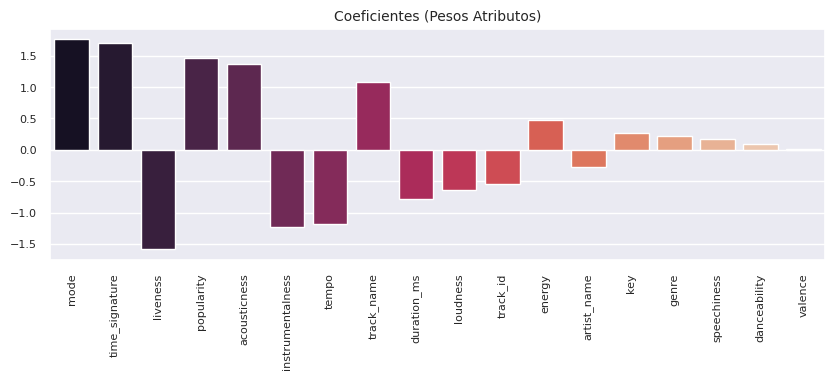

In [84]:
data_used = data_df

column_names = data_used.columns
#use su w entrenado
w = np.random.uniform(-2, 2, size=len( data_used.columns))
max_feat = min(len(w),20)
sorted_idx = np.argsort(np.abs(w))[::-1]

fig, ax = plt.subplots(figsize=(10,3),nrows=1)
p = sns.barplot(x=np.arange(max_feat), y=[w[idx] for idx in sorted_idx[:max_feat]], palette="rocket",ax=ax)
ax.set_xticklabels([column_names[idx] for idx in sorted_idx[:max_feat]])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos)',size=10)
plt.show()

* Mencione tres métricas relevantes para un problema de clasificación multiclase que vayan más allá de "exactitud" (accuracy). Comente detalladamente sus diferencias y relevancias. Desde acá en adelante puede emplear el método Perceptron disponible en sklearn.


In [133]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report

n_classes = 5
base = Perceptron(tol=1e-3,eta0=0.1,random_state=123)
clf = base.fit(X_train.values, y_train.values)
target_names = [number_to_genre[i] for i in clf.classes_]
print(classification_report(y_train.values,clf.predict(X_train.values), target_names=target_names))

              precision    recall  f1-score   support

        Jazz       0.44      0.42      0.43      5990
   Classical       0.69      0.64      0.66      5795
        Rock       0.54      0.60      0.57      5801
  Electronic       0.62      0.42      0.50      5822
         Rap       0.58      0.78      0.67      5856

    accuracy                           0.57     29264
   macro avg       0.57      0.57      0.56     29264
weighted avg       0.57      0.57      0.56     29264




* Para manejar múltiples clases, utilice primero el método **"One versus the Rest"** y luego el método **"OneVsOne"**. Compárelos adecuadamente usando las 3 métricas definidas anteriormente. Mida también el tiempo de entrenamiento.

In [ ]:
clf = OneVsOneClassifier(base).fit()


* ¿Qué técnica (OVO vs OVR) muestra mejor desempeño en entrenamiento?

* ¿Qué técnica (OVO vs OVR) muestra mejor capacidad de generalización?

* Elija uno de los modelos y estime su error de predicción si se decidiera operar con él en la tarea.



### Guardar

El código de más abajo guarda un modelo. Si usted entrenó un modelo con buen desempeño puede valer la pena ejecutar este paso.

In [ ]:
dump(model, 'filename.joblib')

## P5.  El Regresor Logístico

* Entrene un regresor logístico para clasificación. Este método puede trabajar directamente con múltiples clases, pero de todos modos es posible entrenarlo usando **"One versus the Rest"** y **"OneVsOne"**. Compare las 3 metodologías usando las 3 métricas definidas en la sección anterior. Mida también el tiempo de entrenamiento.


In [134]:
#adaptar y completar consistentemente
n_classes = 5
base = LogisticRegression()
clf = OneVsOneClassifier(base).fit(X_train.values, y_train.values)

* Visualice la matriz de confusión correspondiente al modelo entrenado. Comente cuáles son las clases que más se confunden.

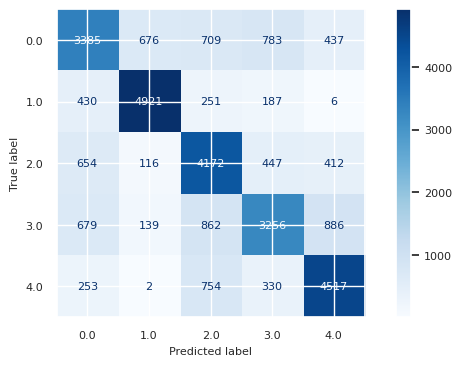

In [141]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train.values, clf.predict(X_train.values), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap = "Blues")

* ¿Anticipa el error de entrenamiento el error de predicción observado? ¿Anticipa el desempeño sobre el conjunto de validación el error de predicción observado?

* Una vez elegida una de las 3 técnicas para entrenar el modelo multi-clase, ¿Es correcto unir el conjunto de validación con el conjunto de entrenamiento para re-entrenar el modelo elegido? ¿Conviene hacerlo en este caso?

* Visualice el peso que cada clasificador en OVO asigna a las diferentes características y comente.


Coeficientes LR + OVO

Par 0,1 - Jazz vs Classical
Par 0,2 - Jazz vs Rock
Par 0,3 - Jazz vs Electronic
Par 0,4 - Jazz vs Rap
Par 1,2 - Classical vs Rock
Par 1,3 - Classical vs Electronic
Par 1,4 - Classical vs Rap
Par 2,3 - Rock vs Electronic
Par 2,4 - Rock vs Rap
Par 3,4 - Electronic vs Rap




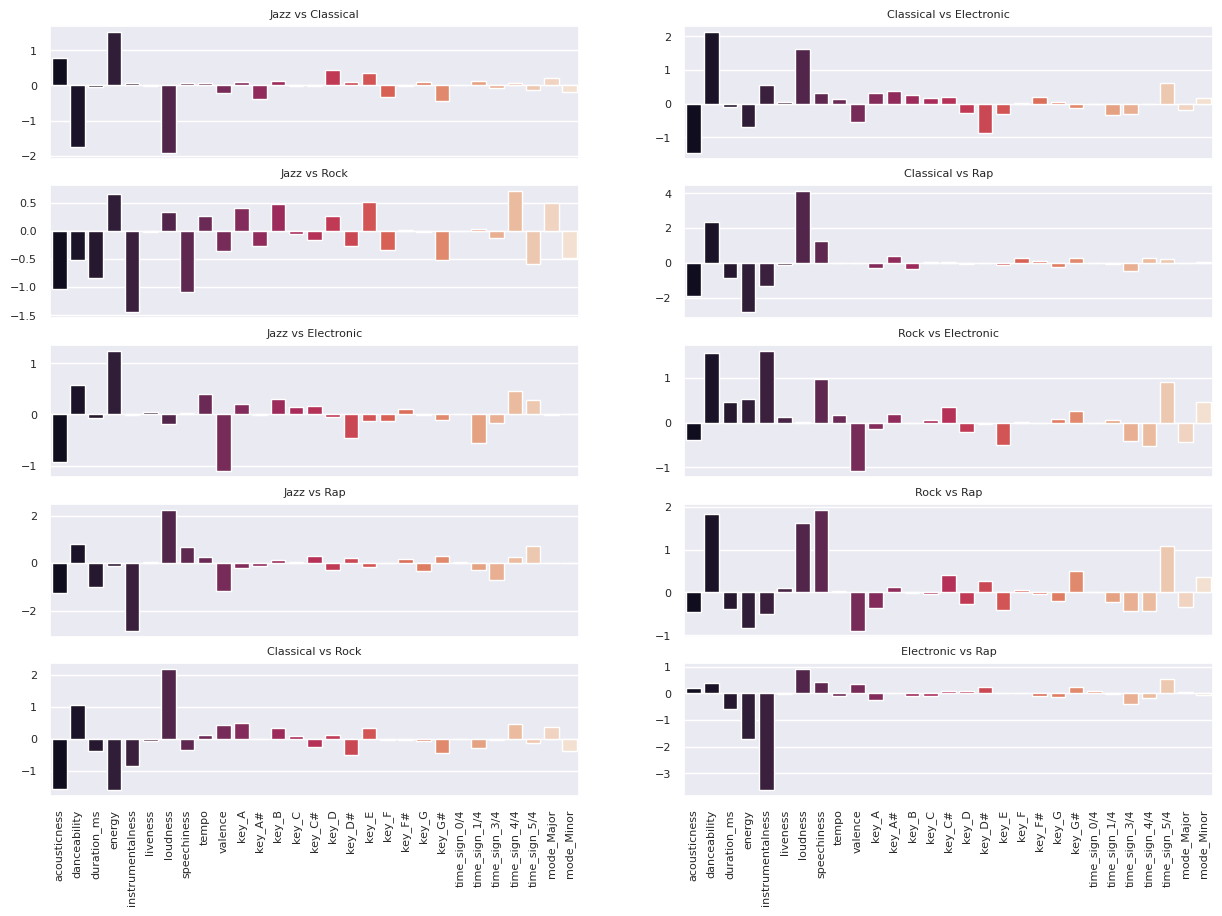

In [110]:
#genres = ['Classical','Electronic','Jazz','Rock','Rap']
#number_to_genre = {i: label for i, label in enumerate(set(genres), 0)}

fig, axes = plt.subplots(figsize=(15,10),nrows=5,ncols=2,sharex=True,sharey=False,squeeze=False)

print("\nCoeficientes LR + OVO\n")

counter = 0

for i in range(len(clf.classes_)):
  for j in range(i+1,len(clf.classes_)):
    estimator = clf.estimators_[counter]
    class1 = number_to_genre[clf.classes_[i]]
    class2 = number_to_genre[clf.classes_[j]]
    print("Par %d,%d - %s vs %s"%(i,j,class1,class2))
    w = estimator.coef_[0,:]
    b = estimator.intercept_

    max_feat = min(len(w),30)

    p=sns.barplot(x=np.arange(max_feat),y=w[:max_feat],palette="rocket",ax=axes[counter%5,counter//5],orient="v")
    axes[counter%5,counter//5].set_xticklabels(X.columns[:max_feat],fontsize=11)
    axes[counter%5,counter//5].set_title('%s vs %s'%(class1,class2),size=8)
    plt.setp(p.get_xticklabels(), rotation=90,size=8)

    counter+=1

print("\n")
plt.show()


* Averigue en qué consiste la técnica denominada "permutation importance" de sklearn y úsela para estimar la importancia de cada atributo en el clasificador multi-clase obtenido vía OVO.


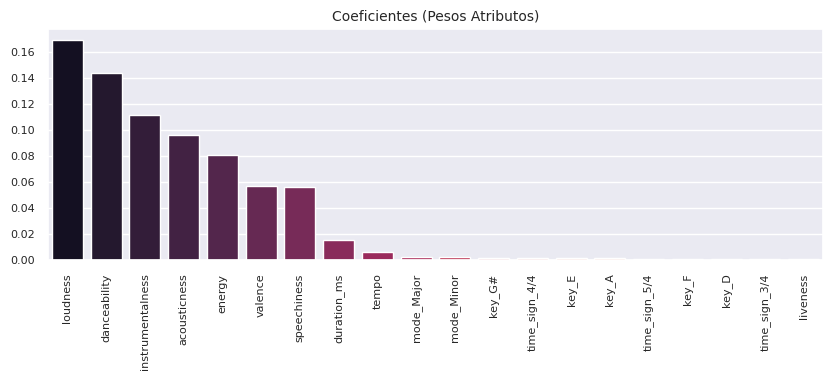

In [125]:
from sklearn.inspection import permutation_importance
model_fi = permutation_importance(clf,X_train.values, y_train.values)

w = model_fi['importances_mean']
column_names = X_train.columns
max_feat = min(len(w),20)
sorted_idx = np.argsort(np.abs(w))[::-1]

fig, ax = plt.subplots(figsize=(10,3),nrows=1)
p = sns.barplot(x=np.arange(max_feat), y=[w[idx] for idx in sorted_idx[:max_feat]], palette="rocket",ax=ax)
ax.set_xticklabels([column_names[idx] for idx in sorted_idx[:max_feat]])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos)',size=10)
plt.show()

* Como el regresor logístico es un clasificador probabilista, es posible obtener directamente (sin heurísticas) la incerteza de la predicción. Proponga un método que use esta información para rechazar la predicción de un % pequeño de datos de test. Determine si su método mejora las métricas del modelo logístico multi-class (obtenido sin heurísticas de agregación) cuando se evalúa sobre los datos que sí se predice.

In [127]:
clf = LogisticRegression()
clf = clf.fit(X_train.values, y_train.values)
probs_train = clf.predict_proba(X_train.values)
print(probs_train)

[[1.14774252e-02 4.35069352e-05 4.16274801e-02 1.37673600e-01
  8.09177988e-01]
 [3.51716945e-01 1.10373350e-02 2.59441536e-01 3.71096516e-01
  6.70766816e-03]
 [6.74081288e-02 2.21221233e-02 5.48097099e-02 8.55528750e-01
  1.31288239e-04]
 ...
 [3.03710283e-02 1.49208248e-03 3.76431695e-02 8.81367878e-01
  4.91258418e-02]
 [3.02203143e-02 9.58575943e-01 1.00621514e-02 9.59460751e-04
  1.82130280e-04]
 [7.61917057e-01 9.36810570e-02 9.28655550e-02 1.17989865e-02
  3.97373441e-02]]


## P6. Validación Cruzada

*  Estime el error de prediccion de dos modelos a elección utilizando validación cruzada (CV). Para esto, una el conjunto de entrenamiento con el de validación y monitoree varias métricas de las elegidas anteriormente, incluyendo exactitud (accuracy). ¿Es conveniente el uso de validación cruzada en lugar de un conjunto de validación? Concluya. *Hint: Look up "cross_validate" function in scikit learn.*

* Evalúe los modelos sobre el conjunto de prueba. ¿El uso de validación cruzada permitió estimar mejor el comportamiento de los modelos en el conjunto de pruebas? Concluya.


* Cargue su mejor modelo.

In [ ]:
clasiffier_model = load('filename.joblib')

* Use validación cruzada para predecir si el uso de las características polinomiales "creadas" en la fase de ingeniería de atributos permite reducir el error de predicción. Solo como ejercicio académico, verifique esta predicción midiendo el error de pruebas del modelo con y sin las características polinomiales.

* Es posible que no lo haya notado, pero el modelo logístico implementado en sklearn contiene algunos "addons" que estudiaremos más adelante y que dependen de hiper-parámetros. Nos concentraremos primero en un hiper-parámetro de regularización denominado "C". Determine el mejor valor de este hiper-parámetro usando validación cruzada (elija una de las métricas monitoreadas hasta ahora). *Hint: this is when we use GridSearchCV.*


In [ ]:
C = np.logspace(-3,3,10)

* Elija ahora el valor de "C" a partir del desempeño en el conjunto de entrenamiento. ¿Es esto correcto? ¿Obtiene resultados más apropiados usando CV?

##  Comentarios Finales
A modo de conclusión, comente que es lo más interesante que aprendió del taller.

## Referencias

***Recuerde si utiliza código disponible en internet siempre debe referenciarlo***. 🤓



*   Referencia 1
*   Referencia 2

